# Pandas
<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/material/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From http://pandas.pydata.org/pandas-docs/stable/

pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

See also:

* https://github.com/restrepo/data-analysis
  * https://classroom.github.com/g/sSMBdBqN
  * https://classroom.github.com/a/PcbQBE7F
* https://github.com/restrepo/PythonTipsAndTricks
* https://pbpython.com/excel-pandas-comp.html [[archive.org](https://web.archive.org/web/20201126143453/https://pbpython.com/excel-pandas-comp.html)]

A good and practice book about `Pandas` possibilities is:

[__Python for Data Analysis__](https://drive.google.com/open?id=0BxoOXsn2EUNIWExXbVc4SDN0YTQ)<br/>
Data Wrangling with Pandas, NumPy, and IPython<br/>
_By William McKinney_


This other is about aplications based on `Pandas`:
![image.png](https://covers.oreillystatic.com/images/0636920030515/cat.gif) [Introduction to Machine Learning with Python](https://drive.google.com/open?id=0BxoOXsn2EUNISGhrdEZ3S29fS3M)<br/>
A Guide for Data Scientists
By Sarah Guido, Andreas Müller

`Pandas` can be used in a similar way to `R`, which is based on similar data structures. `Pandas` also can replace the use of graphical interfaces to access spreadsheets like Excel. In particular, can be used in joint with the module [`xlsxwriter`](https://xlsxwriter.readthedocs.io/tutorial02.html) to produce professional Excel spreadsheets at the programatical level.

The similar data structure in Wolfram Alpha and Mathematica is  the `Dataset`, in C++ is the ROOT framework, and in the old Fortran 77 was `paw`. In this way, a dictionary of equivalent commands can be stablished between the several frameworks

## Standard way to load the module

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd

## Basic structure: DataFrame

An flat _spreadsheet_ can be seen in terms of the types of variables of `Python` just as dictionary of lists, where each column of the spreadsheet is a pair key-list of the dictionary 

|   |  A   |  B   |
|---|:----:|:----:|
| 1 | even | odd  |
| 2 |   0  | 1    |
| 3 |   2  | 3    |
| 4 |   4  | 5    |
| 5 |   6  | 7    |
| 6 |   8  | 9    |

In [5]:
numbers={"even": [0,2,4,6,8],   #  First  key-list
         "odd" : [1,3,5,7,9] }  #  Second key-list

## Data structures

`Pandas` has two new data structures:
1. `DataFrame` which are similar to numpy arrays but with some assigned key. For example, for the previous case
```python
import numpy as np
np.array([[0,1],
          [2,3],
          [4,5],
          [6,7],
          [8,9] 
         ])
```
1. `Series` which are enriched  to dictionaries, as the ones defined for the rows of the previous example: `{'even':0,'odd':1}`.




The rows in a two-dimensional `DataFrame` corresponds to `Series` with similar keys, while the columns are also Series with the indices as keys. 

An example of a  `DataFrame` is a spreadsheet, as the one before.

### `DataFrame`
`Pandas` can convert a dictionary of lists, like the `numbers` dictionary before, into a `DataFrame`, which is just an spreadsheet but interpreted at the programming level:



In [6]:
numbers

{'even': [0, 2, 4, 6, 8], 'odd': [1, 3, 5, 7, 9]}

In [7]:
import pandas as pd
df=pd.DataFrame(numbers)
df

,even,odd
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


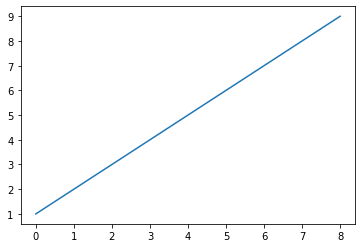

In [8]:
plt.plot(df['even'],df['odd'])

It is equivalent to:

In [9]:
df.to_dict()

{'even': {0: 0, 1: 2, 2: 4, 3: 6, 4: 8}, 'odd': {0: 1, 1: 3, 2: 5, 3: 7, 4: 9}}

In [10]:
pd.DataFrame(  {'even': {0: 0, 1: 2, 2: 4, 3: 6, 4: 8}, 'odd': {0: 1, 1: 3, 2: 5, 3: 7, 4: 9}} )


,even,odd
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [11]:
pd.DataFrame.from_dict(numbers)

,even,odd
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


See below for other possibilities of [creating Pandas DataFrames from lists and dictionaries](https://fisica.udea.edu.co:4443/user/restrepo/notebooks/prog/cursos/data-analysis/Pandas.ipynb#Intialization-from-lists-and-dictionaries)

The main advantage of the `DataFrame`, `df`, is that it can be managed without a graphical interface.

We can check the shape of the `DataFrame`

In [12]:
df.shape

(5, 2)

####  Export DataFrame to other formats
* To export to excel:

In [34]:
df.to_excel('example.xlsx',index=False)

In [35]:
newdf=pd.read_excel('example.xlsx')
newdf

,Nombre,Edad,Compañia
0,Juan Valdez,32,Café de Colombia
1,Álvaro Uribe Vélez,65,Senado de la República


__Activity__: Open the resulting spreadsheet in Google Drive, publish it and open from the resulting link with Pandas in the next cell

In [36]:
df=pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vTrN__P0I9fxuyTLtOZauwU6CZXZ_2GCZF5EcHckp1GT0BvXAm41ucAGtaUhhA7Ug/pub?output=xlsx')
df

,even,odd
0,0.0,1.0
1,2.0,3.0
2,4.0,5.0
3,6.0,7.0
4,8.0,9.0


### `Series`

Each column of the DataFrame is now an augmented dictionary called `Series`, with the indices as the keys of the `Series`

A `Pandas` `Series` object can be just initialized from a `Python` dictionary:

In [16]:
type( df['even'] )

pandas.core.series.Series

The keys are the index of the `DataFrame`

In [17]:
#df['even']
df.even[4]

8.0

Each row is also a series

In [18]:
df.loc[0]

even    0.0
odd     1.0
Name: 0, dtype: float64

with keys: `'even'` and `'odd'`

In [19]:
df.loc[0]['even']

0.0

or attributes `even` and `odd`

In [20]:
df.loc[0].odd

1.0

One specific cell value can be reached with the index and the key:

In [21]:
df.loc[2,'odd']

5.0

In [22]:
s=pd.Series({'Name':'Juan Valdez','Nacionality':'Colombia','Age':23})
s

Name           Juan Valdez
Nacionality       Colombia
Age                     23
dtype: object

*Note* that the key name can be used also as an attribute.


In [23]:
df.odd

0    1.0
1    3.0
2    5.0
3    7.0
4    9.0
Name: odd, dtype: float64

> The __power__ of Pandas rely in that their main data structures: `DataFrames` and `Series`, are enriched with many useful methods and attributes.

### [Official definition of Pandas](http://pandas.pydata.org/pandas-docs/stable/)

> Pandas is a Python package providing __fast__, __flexible__, and __expressive__ _data structures_ designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it _has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool_ available in any language. It is already well on its way toward this goal.

* "relational": the list of data is identified with some unique index (like a `SQL` table)
* "labeled": the list is identified with a key, like the previous `odd` or `even` keys.


For example. A double bracket `[[...]]`, can be used to filter data.

A row in a two-dimensional `DataFrame` corresponds to `Series` with the same keys of the `DataFrame`, but with single values instead of a list 

In [24]:
df.loc[[0]]

,even,odd
0,0.0,1.0


In [25]:
print( 'the row has' )
print( '                  keys: {} and values: {}'.format( list( df.loc[[0]].keys() ),df.loc[[0]].values[0]  ) )
print( "like the dictionay:" )
print( "                      { 'even' : 0, 'odd' : 1 }")

the row has
                  keys: ['even', 'odd'] and values: [0. 1.]
like the dictionay:
                      { 'even' : 0, 'odd' : 1 }


To filter a column:

In [26]:
df[['odd']]

,odd
0,1.0
1,3.0
2,5.0
3,7.0
4,9.0


### More on `Series`

A `Pandas` `Series` object can be just initialized from a `Python` dictionary:

In [27]:
s=pd.Series({'Name':'Juan Valdez','Nacionality':'Colombia','Age':23})
s

Name           Juan Valdez
Nacionality       Colombia
Age                     23
dtype: object

In [28]:
s['Name']

'Juan Valdez'

but also as containers of name spaces!

In [29]:
s.Name

'Juan Valdez'

## `DataFrame` initialization

### Initization from an existing spreadsheet. 
This can be locally in your computer o from some downloadable  link

In [30]:
df=pd.read_excel('http://bit.ly/spreadsheet_xlsx')
df

,Nombre,Edad,Compañia
0,Juan Valdez,23.0,Café de Colombia
1,Álvaro Uribe Vélez,65.0,Senado de la República


To make a downloadable link for any spread sheet in Google Drive, follow the sequence:
```
File → Publish to the web...→ Entire Document → Web page → Microsoft excel (xlsx)
```
as illustrated in the figure:
![GS](https://github.com/restrepo/data-analysis/blob/master/img/img1.png?raw=1)

In [31]:
df.loc[0,'Edad']=32
#df.at[0,'Edad']=32
df

,Nombre,Edad,Compañia
0,Juan Valdez,32.0,Café de Colombia
1,Álvaro Uribe Vélez,65.0,Senado de la República


*After* some modification

it can be saved again as an `excel file` with the option to not create a column of indices: `index=False`

### Intialization from lists and dictionaries

#### Inizialization from Series
We start with an empty `DataFrame`:

Creating Pandas DataFrame from list and dictionaries [offers many alternatives](http://pbpython.com/pandas-list-dict.html)

![creating dataframes](http://pbpython.com/images/pandas-dataframe-shadow.png)

#### Row oriented way
* In addition to the dictionary of lists [already illustrated at the beginning]() that in this case corresponds to:

In [32]:
pd.DataFrame({'Nombre'   : ['Juan Valdez','Álvaro Uribe Vélez'],
              'Edad'     : [32,            69                 ],
              'Compañia' : ['Café de Colombia','Senado de la República']})

,Nombre,Edad,Compañia
0,Juan Valdez,32,Café de Colombia
1,Álvaro Uribe Vélez,69,Senado de la República


* We can obtain the DataFrame from list of items

In [33]:
pd.DataFrame.from_items([ [ 'Nombre'  , ['Juan Valdez','Álvaro Uribe Vélez']],
                          [ 'Edad'    , [  32,            65               ]],
                          [ 'Compañia', ['Café de Colombia','Senado de la República']] ])

AttributeError: ignored

* We can obtain the `DataFrame` from dictionary

In [37]:
pd.DataFrame( [{'Nombre':'Juan Valdez',        'Edad': 32   ,'Compañia':'Café de Colombia'      },
              {'Nombre':'Álvaro Uribe Vélez', 'Edad': 65   ,'Compañia':'Senado de la República'}]
            )

,Nombre,Edad,Compañia
0,Juan Valdez,32,Café de Colombia
1,Álvaro Uribe Vélez,65,Senado de la República


In [38]:
df=pd.DataFrame()
df


""


### Initialization from sequential rows as  Series
We start with an empty `DataFrame`:

In [41]:
df=pd.DataFrame()
df.empty

True

We can append a dictionary (or Series) as a row of the `DataFrame`, provided that we always use the option: `ignore_index=True`

In [42]:
d={'Name':'Juan Valdez','Nacionality':'Colombia','Age':23}
df=df.append(d,ignore_index=True)
df

,Name,Nacionality,Age
0,Juan Valdez,Colombia,23.0


We can fix the type of data of the `'Age'` column

In [43]:
type(df.Age[0])

numpy.float64

In [44]:
df['Age']=df.Age.astype(int)
df

,Name,Nacionality,Age
0,Juan Valdez,Colombia,23


To add a second file we build another `dict`

In [45]:
d={}
for k in ['Name','Nacionality','Age','Company']:
    var=input('{}:\n'.format(k))
    d[k]=var

Name:
santiago
Nacionality:
colombia
Age:
19
Company:
UdeA


In [46]:
d

{'Age': '19', 'Company': 'UdeA', 'Nacionality': 'colombia', 'Name': 'santiago'}

In [47]:
df.append(d,ignore_index=True)

,Name,Nacionality,Age,Company
0,Juan Valdez,Colombia,23,NaN
1,santiago,colombia,19,UdeA


#### Exercises
* Display the resulting `Series` in the screen:

* Append to the previous `DataFrame` and visualize it:

In [48]:
df=df.append(d,ignore_index=True)
df

,Name,Nacionality,Age,Company
0,Juan Valdez,Colombia,23,NaN
1,santiago,colombia,19,UdeA


* Fill NaN with empty strings

In [49]:
df=df.fillna('')

In [50]:
df

,Name,Nacionality,Age,Company
0,Juan Valdez,Colombia,23,
1,santiago,colombia,19,UdeA


* Save `Pandas` `DataFrame` as an Excel file

In [51]:
df.to_excel('prof.xlsx',index=False)

* Load pandas DataFrame from the saved file in Excel

In [52]:
pd.read_excel('prof.xlsx')

,Name,Nacionality,Age,Company
0,Juan Valdez,Colombia,23,NaN
1,santiago,colombia,19,UdeA


### Common operations upon `DataFrames`
See https://github.com/restrepo/PythonTipsAndTricks

* __To fill a specific cell__

In [53]:
df.at[0,'Company']='Federación de Caferos'

In [54]:
df

,Name,Nacionality,Age,Company
0,Juan Valdez,Colombia,23,Federación de Caferos
1,santiago,colombia,19,UdeA


## Other formats to saving and read files
We are interested in format which keeps the tags of the columns, like `'Nombre', 'Edad', 'Compañia'`

In [55]:
df=pd.read_excel('http://bit.ly/spreadsheet_xlsx')
df

,Nombre,Edad,Compañia
0,Juan Valdez,23.0,Café de Colombia
1,Álvaro Uribe Vélez,65.0,Senado de la República


In [56]:
type(df.loc[0,'Edad'])

numpy.float64

#### CSV

In [57]:
df.to_csv('hoja.csv',index=False)

We can check the explicit file format with

In [58]:
df.to_csv(None,index=False)

'Nombre,Edad,Compañia\nJuan Valdez,23.0,Café de Colombia\nÁlvaro Uribe Vélez,65.0,Senado de la República\n'

In [59]:
print(df.to_csv(None,index=False))

Nombre,Edad,Compañia
Juan Valdez,23.0,Café de Colombia
Álvaro Uribe Vélez,65.0,Senado de la República



In [60]:
pd.read_csv('hoja.csv')

,Nombre,Edad,Compañia
0,Juan Valdez,23.0,Café de Colombia
1,Álvaro Uribe Vélez,65.0,Senado de la República


#### JSON

This format keeps the Python lists and dictionaries at the storage level

In [61]:
df=pd.DataFrame([{"Name":"Donald Trump","Age":74},
                 {"Name":"Barak Obama", "Age":59}])
df

,Name,Age
0,Donald Trump,74
1,Barak Obama,59


This format allow us to keep exactly the very same list of dictionaries structure!

In [62]:
print(df.to_json(None,orient='records'))

[{"Name":"Donald Trump","Age":74},{"Name":"Barak Obama","Age":59}]


__Activity__: 
* Save to a file instead of `None` and open the file with some editor. 

In [63]:
df.to_json('presidents.json',orient='records')

In [64]:
cat presidents.json

[{"Name":"Donald Trump","Age":74},{"Name":"Barak Obama","Age":59}]

* Add a break-line at the end of the first dictionary and try to
load the resulting file with `pd.read_json`

In [65]:
pd.read_json('presidents.json')

,Name,Age
0,Donald Trump,74
1,Barak Obama,59


In [66]:
# %load presidents.json
[{"Name":"Donald Trump","Age":74},{"Name":"Barak Obama","Age":59}]


[{'Age': 74, 'Name': 'Donald Trump'}, {'Age': 59, 'Name': 'Barak Obama'}]

JSON allows for some flexibility in the break-lines structure:

In [67]:
hm='''
hola
mundo
'''

In [68]:
hm

'\nhola\nmundo\n'

In [69]:
pd.read_json('''
             [{"Name":"Donald Trump","Age":73},
              {"Name":"Barak Obama", "Age":58}]
            ''')

,Name,Age
0,Donald Trump,73
1,Barak Obama,58


For large databases it is convinient just to accumulate dictionaries in a sequential form:

In [70]:
print(df.to_json(None,orient='records',lines=True))

{"Name":"Donald Trump","Age":74}
{"Name":"Barak Obama","Age":59}



In [71]:
pd.read_json('''
             {"Name":"Donald Trump","Age":73}
             {"Name":"Barak Obama", "Age":58}
            ''',orient='records',lines=True)

,Name,Age
0,Donald Trump,73
1,Barak Obama,58


__Activity__: 
* Save to a file instead of `None`, with options: `orient='records',lines=True`, and open the file with some editor. 

In [72]:
df.to_json('presidents.json',orient='records',lines=True)

In [73]:
cat presidents.json

{"Name":"Donald Trump","Age":74}
{"Name":"Barak Obama","Age":59}


* Add a similar dictionary in the next new line, and try to
load the resulting file with `pd.read_json` with options: `orient='records',lines=True`. 
   * WARNING: Use doble-quotes `"` to write the keys od the new
dictionary

In [74]:
pd.read_json('''
             {"Name":"Donald Trump","Age":73}
             {"Name":"Barak Obama", "Age":58}
             {"Name":"Geoge Bush", "Age":100}
            ''',orient='records',lines=True)

,Name,Age
0,Donald Trump,73
1,Barak Obama,58
2,Geoge Bush,100


Any Python string need to be converted first to double-quotes before to be used as JSON string.

__Example__

In [75]:
numbers={"even": [0,2,4,-6,8],   #  First  key-list
         "odd" : [1,3,-5,7,9] }  #  Second key-list

In [76]:
numbers

{'even': [0, 2, 4, -6, 8], 'odd': [1, 3, -5, 7, 9]}

In [77]:
str(numbers)

"{'even': [0, 2, 4, -6, 8], 'odd': [1, 3, -5, 7, 9]}"

This string can be writing in the `JSON` format by replacing the single quotes, ' , by  duoble quotes, ":

In [78]:
str(numbers).replace("'",'"')

'{"even": [0, 2, 4, -6, 8], "odd": [1, 3, -5, 7, 9]}'

and now can be used as an JSON input

In [79]:
df=pd.read_json(  str(numbers).replace("'",'"') )
df

,even,odd
0,0,1
1,2,3
2,4,-5
3,-6,7
4,8,9


__Activity__: Try to read the string as JSON without make the double-quote replacement

## Filters
The main application of labeled data for data analysis is the possibility to make filers, or cuts, to obtain specific reduced datasets to further analysis

In [84]:
import pandas as pd

In [85]:
numbers={"even": [0,2,4,-6,8],   #  First  key-list
         "odd" : [1,3,-5,7,9] }  #  Second key-list

In [86]:
df=pd.DataFrame(numbers)

In [87]:
df

,even,odd
0,0,1
1,2,3
2,4,-5
3,-6,7
4,8,9


A filter is a list of `True/False` values

In [88]:
df.even.abs()>4

0    False
1    False
2    False
3     True
4     True
Name: even, dtype: bool

In [89]:
df[df.even.abs()>4]

,even,odd
3,-6,7
4,8,9


In [90]:
#and
df[(df.even>0) & (df.odd<0)]

,even,odd
2,4,-5


In [91]:
df[~((df.even>0) & (df.odd<0)) ]

,even,odd
0,0,1
1,2,3
3,-6,7
4,8,9


In [92]:
#or
df[(df.even<0) | (df.odd<0)]

,even,odd
2,4,-5
3,-6,7


## The `apply` method
The advantage of the spreadsheet paradigm is that the columns can be transformed with functions. All the typical functions avalaible for a spreadsheet are already implemented like the method `.abs()` used before, or the method: `.sum()`

In [93]:
df.even.sum()

8

__Activity__: Explore the avalaible methods by using the completion system of the notebook after the last semicolon of `df.even.`

In [99]:
df.even.argmin(),df.even.median(),df.even.max()

(3, 2.0, 8)

In addittion, for the `DataFrame` paradigm, we can easy implement any other function directly at the programming level either along the columns or along the rows

### Column-level `apply`
We just select the column and apply the direct or implicit function:
* Pre-defined function

In [100]:
df.even.apply(abs)

0    0
1    2
2    4
3    6
4    8
Name: even, dtype: int64

* Implicit function

In [101]:
df.even.apply(lambda n:isinstance(n,int))

0    True
1    True
2    True
3    True
4    True
Name: even, dtype: bool

In [102]:
df.even.apply(lambda n: n**2)

0     0
1     4
2    16
3    36
4    64
Name: even, dtype: int64

### Row-level apply
The foll row is passed as dictionary to the explicit or implicit function when `apply` is used for the full `DataFrame` and the option `axis=1` is used at the end

In [103]:
df['even']+df['odd']

0     1
1     5
2    -1
3     1
4    17
dtype: int64

In [104]:
df.apply(lambda row: row['even']+row['odd']**2,axis='columns')

0     1
1    11
2    29
3    43
4    89
dtype: int64

## Chain tools for data analysis
There are several chain tools for data analyis like the
* Spreadsheet based one, like Excel 
* Relational databases with the use of more advanced SQL tabular data with some data base software like MySQL
* Non-relational databases (RAM) with Pandas, R,  Paw,... ( max ~ RAM/8) 
* Non-relational databases (Disk): Dask, ROOT, MongoDB,...

Here we illustrate an example of use fo a non-relational database with Pandas

## Relational databases

In [116]:
personas=pd.read_csv('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/personas.csv')
#personas=pd.read_csv('../data/personas.csv')
personas

,Nombre,Fecha de Nacimiento,id
0,Juan Valdez,1966-07-04,888
1,Álvaro Uribe Vélez,1952-07-04,666


In [117]:
trabajos=pd.read_csv('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/trabajos.csv',na_filter=False)
#trabajos=pd.read_csv('../data/trabajos.csv',na_filter=False)
trabajos

,id,Inicio,Fin,Cargo,Compañía
0,888,2010,,Arriero,Café de Colombia
1,666,2013,2020,Senador,Senado de la República de Colombia
2,666,2020,,Influencer,Twitter


![img](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/figures/relation.svg)

### Activity
Obtain the current work of Álavro Uribe Vélez 

In [118]:
trabajos

,id,Inicio,Fin,Cargo,Compañía
0,888,2010,,Arriero,Café de Colombia
1,666,2013,2020,Senador,Senado de la República de Colombia
2,666,2020,,Influencer,Twitter


In [119]:
pip install unidecode

     |████████████████████████████████| 235 kB 5.1 MB/s 


In [120]:
import unidecode

In [124]:
cc=personas[personas['Nombre'].str.lower().str.contains('álvaro uribe vélez')].iloc[0].get('id')
t=trabajos[trabajos['id']==cc]
t[t['Fin']==''].iloc[0]['Cargo']

'Influencer'

In [121]:
personas[personas['Nombre'].str.lower().apply(unidecode.unidecode).str.contains('alvaro uribe velez')].iloc[0].get('id')

666

In [125]:
trabajos[trabajos.get('id')==cc]['Cargo'].to_list()


['Senador', 'Influencer']

## Non-relational databases

Listas de diccionarios anidados con una esquema de datos definido

![img](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/figures/personajes.svg)

In [126]:
personas['Fecha de Nacimiento']=pd.to_datetime( personas['Fecha de Nacimiento'] )

In [127]:
personas

,Nombre,Fecha de Nacimiento,id
0,Juan Valdez,1966-07-04,888
1,Álvaro Uribe Vélez,1952-07-04,666


Extract-Transform-Load: ETL

In [128]:
from dateutil.relativedelta import relativedelta

In [129]:
personas['Edad']=personas['Fecha de Nacimiento'].apply(lambda t: 
                        relativedelta( pd.to_datetime('now'), t).years )

In [130]:
trabajos[trabajos['id']==666].to_dict(orient='records')

[{'Cargo': 'Senador',
  'Compañía': 'Senado de la República de Colombia',
  'Fin': '2020',
  'Inicio': 2013,
  'id': 666},
 {'Cargo': 'Influencer',
  'Compañía': 'Twitter',
  'Fin': '',
  'Inicio': 2020,
  'id': 666}]

In [131]:
personas['Trabajos']=personas['id'].apply(lambda i:  trabajos[trabajos['id']==i
                                                             ][['Inicio','Fin','Cargo','Compañía']
                                                              ].to_dict(orient='records') )

In [132]:
personajes=personas[['Nombre','Edad','Trabajos']]

In [133]:
personajes

,Nombre,Edad,Trabajos
0,Juan Valdez,55,"[{'Inicio': 2010, 'Fin': '', 'Cargo': 'Arriero..."
1,Álvaro Uribe Vélez,69,"[{'Inicio': 2013, 'Fin': '2020', 'Cargo': 'Sen..."


In [134]:
from IPython.display import JSON

In [135]:
JSON( personajes.to_dict(orient='records') )

<IPython.core.display.JSON object>

### Actividad
Obtenga el último trabajo de Álvaro Uribe Vélez

In [139]:
l=personajes[personajes['Nombre']=='Álvaro Uribe Vélez'
          ].get('Trabajos').iloc[0]
[d.get('Cargo') for d in l if not d.get('Fin')]

['Influencer']

We have shown that the simple two dimensional spreadsheets where each cell values is a simple type like string, integer, or float, can be represented as a dictionary of lists values or a list of dictionary column-value assignment. 

We can go further and allow to store in the value itself a more general data structure, like nested lists and dictionaries. This allows advanced data-analysis when the `apply` methos is used to operate inside the nested lists or dictionaries.

See for example:


##  World wide web
There are really three kinds of web
* The normal web, 
* The deep web,
* _The machine web_. The web for machine readable responses. It is served in `JSON` or `XML`  formats, which preserve programming objects.

### Normal web

In [140]:
pd.read_html('https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory')[0][1:]

,COVID-19 pandemic,COVID-19 pandemic.1
1,Disease,COVID-19
2,Virus strain,SARS-CoV-2
3,Source,"Probably bats, possibly via pangolins[2][3]"
4,Location,Worldwide
5,First outbreak,China[4]
6,Index case,"Wuhan, Hubei, China.mw-parser-output .geo-defa..."
7,Date,"17 November 2019[4] – present(2 years, 4 month..."
8,Confirmed cases,"495,130,920[5]"
9,Deaths,"6,166,510[5]"
10,Vaccinations,"5,093,730,671[5] (total vaccinated)4,584,534,2..."


Real world example: microsoft academics
![img](https://docs.microsoft.com/en-us/academic-services/graph/media/erd/entity-relationship-diagram.png)

### Machine web
For example, consider the following normal web page:

http://old.inspirehep.net/search?p=doi:10.1103/PhysRevLett.122.132001

about a Scientific paper with people from the University of Antioquia. A _machine web_ version can be easily obtained in JSON just by attaching the extra parameter `&of=recjson`, and direcly loaded from Pandas, which works like a _browser for the third web_:

In [143]:
import pandas as pd

In [144]:
df=pd.read_json('http://old.inspirehep.net/search?p=doi:10.1103/PhysRevLett.122.132001&of=recjson')

URLError: ignored

In [ ]:
df

We can see that the column `authors` is quite nested: Is a list of dictionaries with the full information for each one of the authors of the article.

In [ ]:
df.columns

In [ ]:
df.number_of_authors

In [ ]:
df.authors

__Activity__: Check that the lenght of the auhors list coincides with the `number_of_authors` 
<!-- df.authors.apply(len),df.number_of_authors.values -->

In [ ]:
df.authors.apply(len)

In [ ]:
df.authors[0][0]

 We can use all the previous methods to extract the authors from `'Antioquia U.'`:
 
 Note: For a dictionary, `d` is safer to use `d.get('key')` instead of just `d['key']` to obtain some `key`, because not error is generated if the requested `key` does not exists at all 

In [ ]:
df.authors.apply(lambda l: [d for d in l if d.get('affiliation')=='Antioquia U.']).loc[0]

We also need use comprenhension list like in

In [ ]:
l=[1,2,3]

In [ ]:
[x if x>1 else 3 for x in l ]

Then the on-fly apply function to extract the authors with affiliation 'Antioquia U.' is

In [ ]:
df.authors.apply(lambda l:  #implicit function
                           [ d.get('full_name') #safer way to obtain a `key` value
                             for d in l   #comprehension list 
                              if isinstance(d,dict) and d.get('affiliation')=='Antioquia U.' #condition
                           ] 
                             if isinstance(l,list) else None #  Be sure that cell have the proper format
                 )

A simpler version is possible,  but is more prompted to error when used through multiple column entries:

In [ ]:
df.authors.apply(lambda l: [ d['full_name'] for d in l   
                              if d['affiliation']=='Antioquia U.'
                           ] )

For further details see: https://github.com/restrepo/inspire/blob/master/gfif.ipynb


__Activity__: Repeat the same activity but using directly the JSON file

__NOTE__: The same but with the new API

In [147]:
#See: https://github.com/inspirehep/rest-api-doc/issues/4#issuecomment-645218074
import requests                                                                                                                                                      
response = requests.get('https://inspirehep.net/api/doi/10.1103/PhysRevLett.122.132001')                                                                              
authors = response.json()['metadata']['authors']                                                                                                                     
names = [author.get('full_name')
              for author in authors 
               if any(aff.get('value') == 'Antioquia U.' for aff in author.get('affiliations'))]
names

['Sirunyan, Albert M',
 'Tumasyan, Armen',
 'Adam, Wolfgang',
 'Ambrogi, Federico',
 'Bergauer, Thomas',
 'Brandstetter, Johannes',
 'Dragicevic, Marko',
 'Erö, Janos',
 'Escalante Del Valle, Alberto',
 'Flechl, Martin',
 'Fruehwirth, Rudolf',
 'Jeitler, Manfred',
 'Krammer, Natascha',
 'Krätschmer, Ilse',
 'Liko, Dietrich',
 'Madlener, Thomas',
 'Mikulec, Ivan',
 'Rad, Navid',
 'Schieck, Jochen',
 'Schöfbeck, Robert',
 'Spanring, Markus',
 'Spitzbart, Daniel',
 'Waltenberger, Wolfgang',
 'Wittmann, Johannes',
 'Wulz, Claudia-Elisabeth',
 'Zarucki, Mateusz',
 'Drugakov, Vladimir',
 'Mossolov, Vladimir',
 'Suarez Gonzalez, Juan',
 'Darwish, Mohamed Rashad',
 'De Wolf, Eddi A',
 'Di Croce, Davide',
 'Janssen, Xavier',
 'Lauwers, Jasper',
 'Lelek, Aleksandra',
 'Pieters, Maxim',
 'Van Haevermaet, Hans',
 'Van Mechelen, Pierre',
 'Van Remortel, Nick',
 'Blekman, Freya',
 'Bols, Emil Sørensen',
 'Chhibra, Simranjit Singh',
 "D'Hondt, Jorgen",
 'De Clercq, Jarne',
 'Flouris, Giannis',
 'Lont

##  ACTIVITIES
See:
* https://github.com/ajcr/100-pandas-puzzles
* https://github.com/guipsamora/pandas_exercises

## Final remarks
With basic scripting and Pandas we already have a solid environment to analyse data. We introduce the other libraries motivated with the extending the capabilities of Pandas

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f91b818d-f536-4b8f-81de-61752e0979b7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>